In [9]:
!pip install pystan fbprophet

import datetime as dt
import itertools
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from fbprophet import Prophet
from pylab import *
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


data_src_path = 'data_source/AirPassengers.csv'
df = pd.read_csv(data_src_path)
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [10]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Text(0, 0.5, 'passengers')

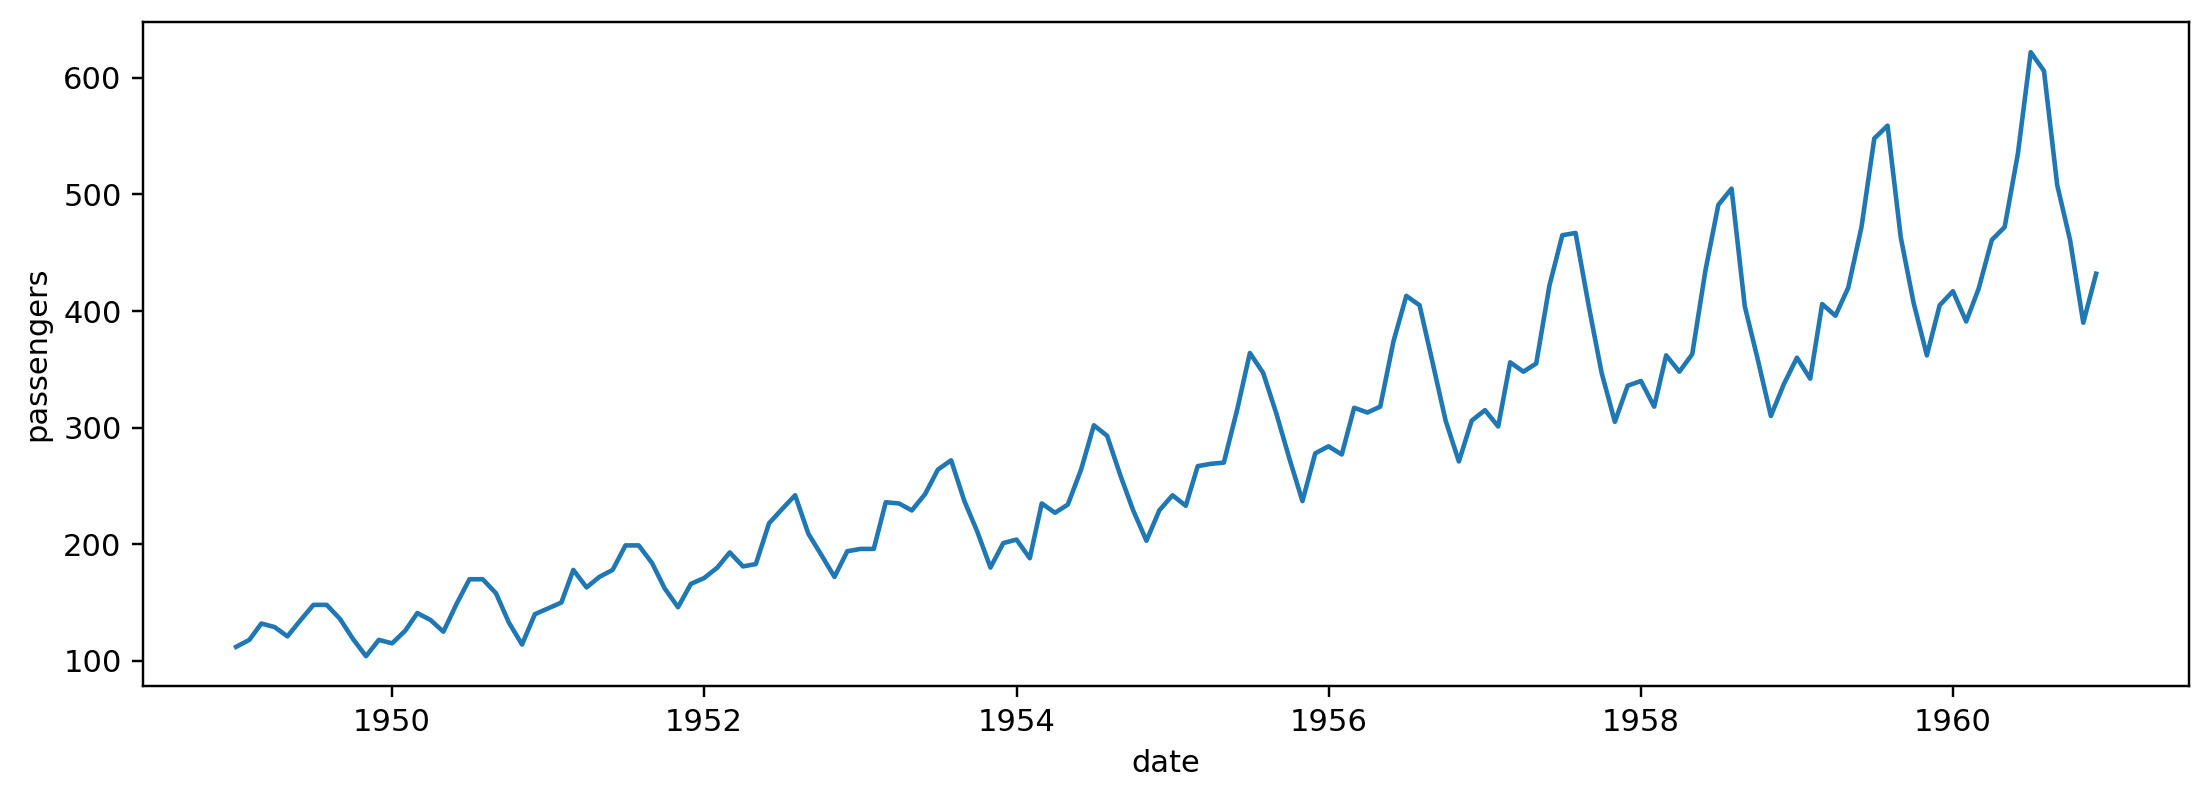

In [11]:
fig, axes = plt.subplots(figsize=(12,4), dpi=220)
axes.plot(df['Month'], df["#Passengers"])
axes.set_xlabel('date')
axes.set_ylabel('passengers')

In [16]:
train_df = df.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})

train_df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [17]:
model = Prophet(interval_width=0.95)
model.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future_df = model.make_future_dataframe(periods=36, freq='MS')
future_df.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [22]:
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.059659,606.550747,695.801619
176,1963-09-01,602.755802,559.068019,646.589795
177,1963-10-01,566.569663,526.213472,608.466367
178,1963-11-01,534.733242,491.499693,576.472494
179,1963-12-01,564.363327,521.088774,609.893607


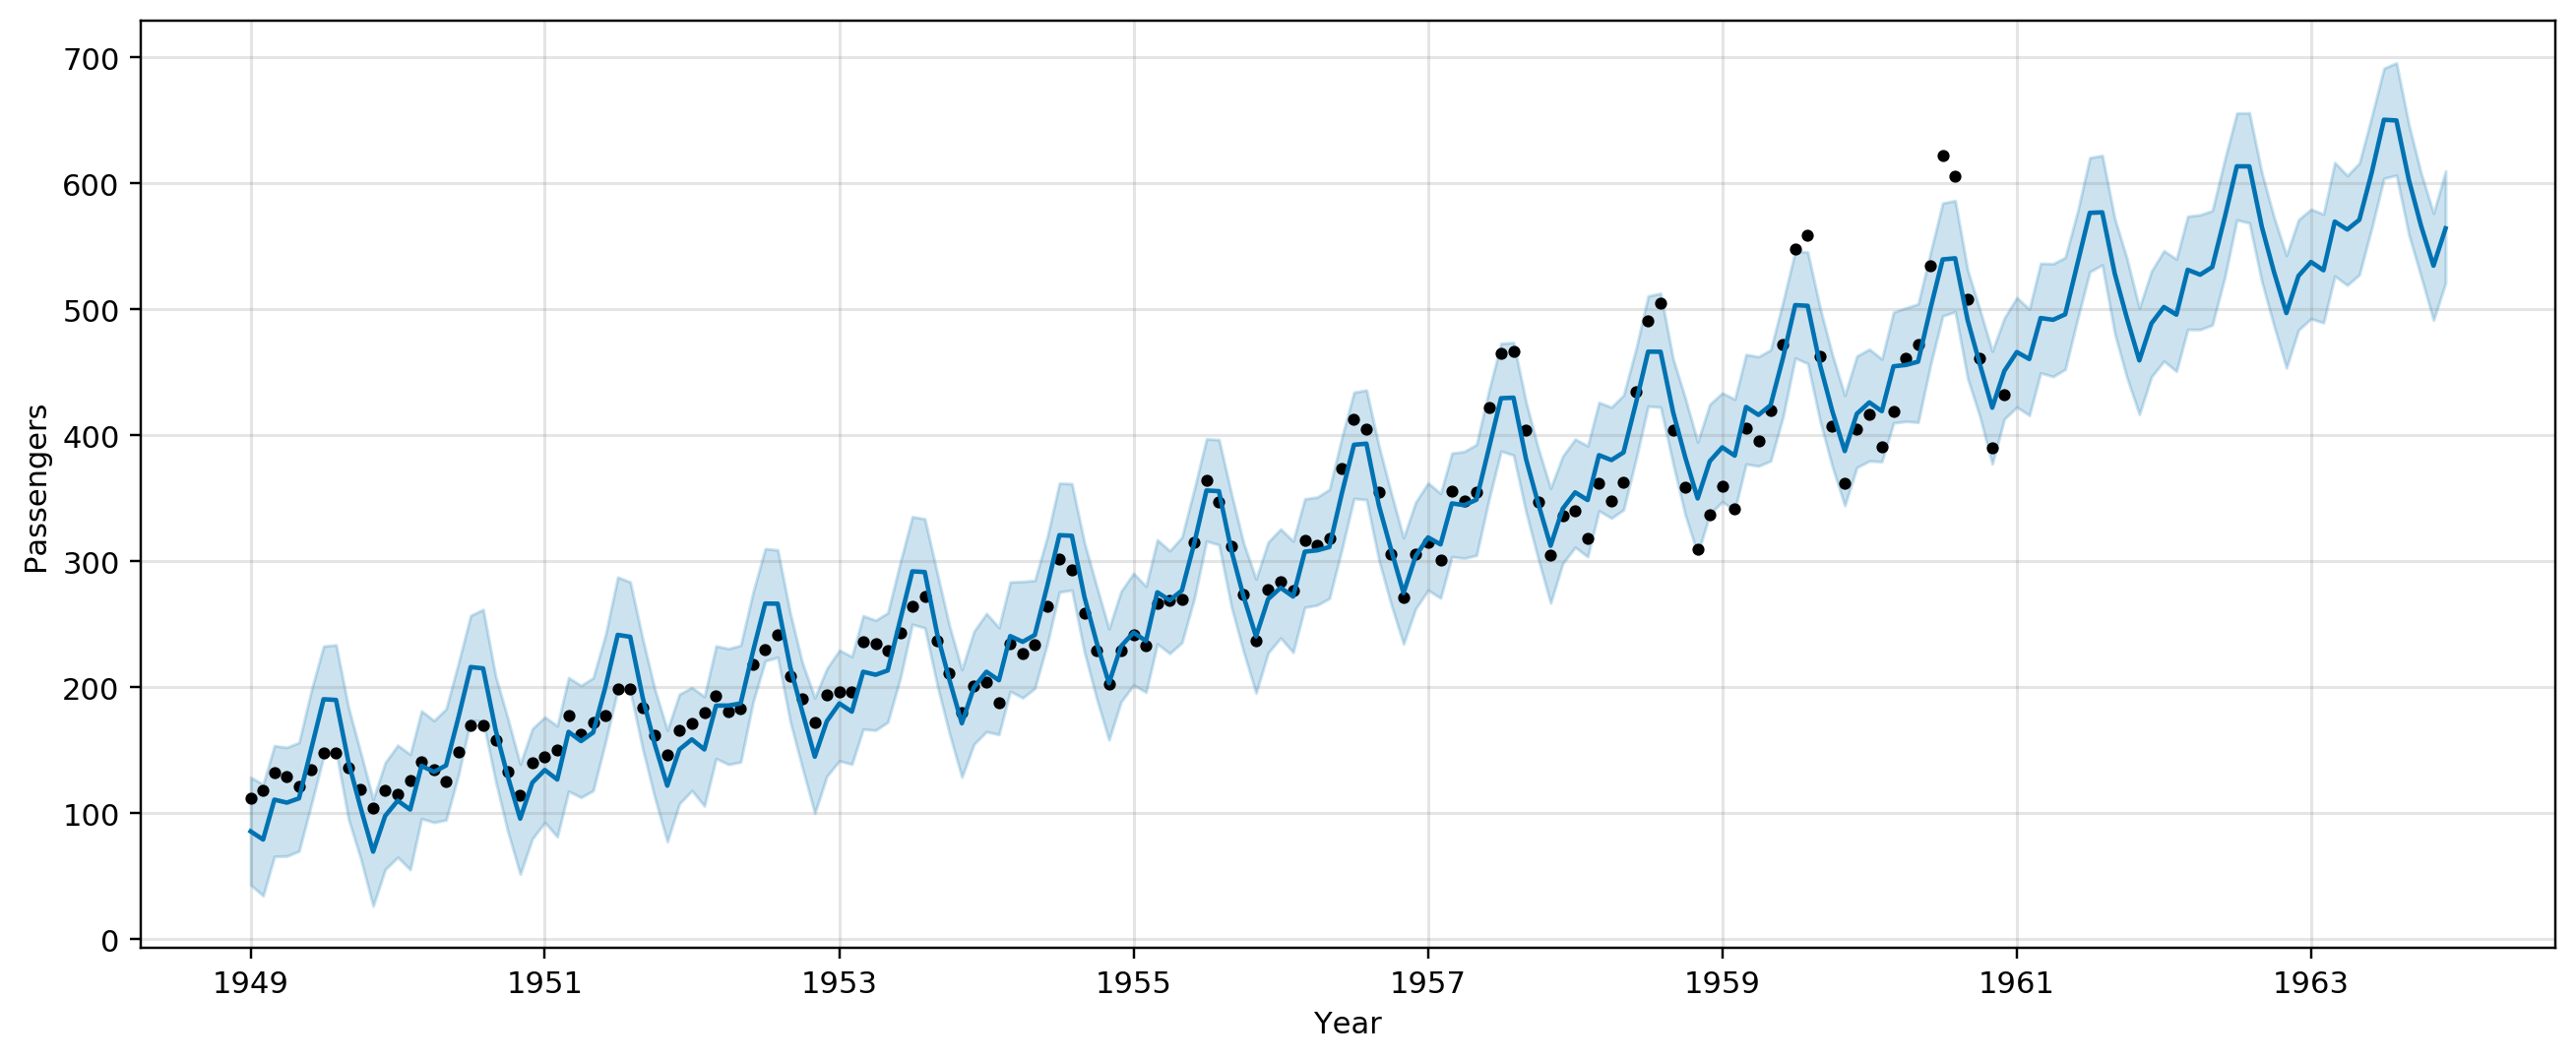

In [48]:
from fbprophet import plot as prophet_plot

fig, axes = plt.subplots(figsize=(12,5), dpi=220)
prophet_plot.plot(m=model, fcst=forecast, uncertainty=True, ax=axes, xlabel='Year', ylabel='Passengers');